# Objetivo deste notebook:  


- Visualizar resultados modelos - feature selectors - k


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('.csv')
df.sort_values(by=['k', 'accuracy'], ascending=[True, False]).groupby('k').first()

,accuracy,params,duration,modelo,feature selector
k,,,,,
1,0.072727,"2.0,0.03",0 days 00:00:00.613083,NeuralNet,InfoGain
4,0.109091,"2.0,0.01",0 days 00:00:00.715817,NeuralNet,InfoGain
10,0.127273,"1.0,0.03",0 days 00:00:00.586183,NeuralNet,PCA
15,0.145455,"1.0,0.03",0 days 00:00:00.585277,NeuralNet,PCA
19,0.109091,"1.0,0.03",0 days 00:00:00.615672,NeuralNet,PCA
30,0.127273,"gini,log2,0.0040275293361981,13",0 days 00:00:02.172815,RandomForest,ANOVA
75,0.136364,"2.0,0.01",0 days 00:00:00.734765,NeuralNet,InfoGain
500,0.172727,"1.0,0.03",0 days 00:00:00.722305,NeuralNet,InfoGain
1100,0.136364,"gini,sqrt,0.0004670842993727,8",0 days 00:00:01.641559,RandomForest,ANOVA


In [3]:
df[(df["feature selector"]=="PCA")].sort_values(by=['k', 'accuracy'], ascending=[True, True]).groupby('k').first()

,accuracy,params,duration,modelo,feature selector
k,,,,,
10,0.127273,"1.0,0.03",0 days 00:00:00.586183,NeuralNet,PCA
15,0.145455,"1.0,0.03",0 days 00:00:00.585277,NeuralNet,PCA
19,0.109091,"1.0,0.03",0 days 00:00:00.615672,NeuralNet,PCA


In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def plot_four_models(df, ax, modelos, i):
    model = modelos[i]
    
    sns.lineplot(
        data=df[df['modelo']==model], 
        x='k', 
        y='accuracy', 
        hue='feature selector',
        ax = ax,
        markers=True,
    )
    
    ax.set(
        title=model,
#         ylim=(0.75, 1.0),
        xlabel = None,
        ylabel = None,
    )
    
    ax.locator_params(axis='y', nbins=10)
    
    if i != 3:
        ax.get_legend().remove()
    
    return ax


In [5]:
def plot_with_inset(df, ax, modelos, i):
    model = modelos[i]
    sns.set_theme(style="whitegrid")
    subgrafico_id = ["a", "b", "c", "d", "e", "f"]

    sns.lineplot(
        data = df[(df.modelo==model) & (df.k>=25)], 
        x = 'k', 
        y = 'accuracy', 
        hue = 'feature selector',
        ax = ax,
        markers = True,
    )
    
    ax.set(
        title=f"{subgrafico_id[i]}) {model}",
#         ylim=(0.75, 1.0),
        xlabel = None,
        ylabel = None,
    )
    
    ax.set_xticks([25, 500, 1000, 1500, 2000, 2548])
    
    if model == "Rede neural (MLP)":
        ax.set_yticks([
            .55, .6, .65, 
            .7, .75, .8, .85, 
            .9, .95, 1
        ])
    
    else:
        ax.set_yticks([
            .75, .775, .8, .825, .85, .875, 
            .9, .925, .95, .975, 1
        ])
    
    ax.legend(loc=3, borderaxespad=0.5)
    
    
    #bbox_to_anchor=(1.05, 1)
    
    if i != 0:
        ax.get_legend().remove()
        
        
    loc, borderpad = ("lower right", 2) 
    axins = inset_axes(ax, "30%", "40%", loc=loc, borderpad=borderpad)
        
    sns.set_theme(style="darkgrid")  
    
    sns.lineplot(
        data = df[(df.modelo==model) & (df.k<=25)], 
        x = 'k', 
        y = 'accuracy', 
        hue = 'feature selector',
        ax = axins,
        markers = True,
    )
    sns.set_theme(style="darkgrid")
    axins.set(ylabel=None, xlabel=None)
    axins.set_xticks([0, 5, 10, 15, 20, 25])
    axins.set_yticks([.4, .5, .6, .7, .8, .9, 1])
    axins.yaxis.tick_left()
    axins.patch.set_edgecolor('black')  
    axins.patch.set_linewidth('1.5')
    axins.yaxis.set_label_position("left")
    axins.get_legend().remove()
    
    return ax

In [6]:
df.loc[df["feature selector"]=="InfoGain", "feature selector"] = "Mutual Info"
df.loc[df["feature selector"]=="pearson", "feature selector"] = "Corr. Pearson"
df.loc[df["feature selector"]=="spearman", "feature selector"] = "Corr. Spearman"

In [7]:
df.loc[df["modelo"]=="LogReg", "modelo"] = "Regressão logística"
df.loc[df["modelo"]=="XGB", "modelo"] = "XGBoost"
df.loc[df["modelo"]=="NeuralNet", "modelo"] = "Rede neural (MLP)"

In [10]:
modelos = ['KNN', "Regressão logística", 'RandomForest', 'SVM', "XGBoost", "Rede neural (MLP)"]

In [12]:
sns.set_theme(style="whitegrid")
f, axs = plt.subplots(3, 2, figsize=(13,17))


ax = f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, grid_alpha=0)
# plt.ylabel()
plt.xlabel("Número de features")
ax.set_ylabel("Acurácia", rotation=90, labelpad=20)


for i in range(6):
    ax = axs[i//2][i%2]
    ax = plot_with_inset(df, ax, modelos, i)


Error in callback <function _draw_all_if_interactive at 0x0000019BEA6E7910> (for post_execute):


TypeError: must be real number, not str

TypeError: must be real number, not str

<Figure size 1300x1700 with 12 Axes>

In [ ]:
ax.figure.savefig(f"imgs/todos_modelos_acc_por_k.png", dpi=80)

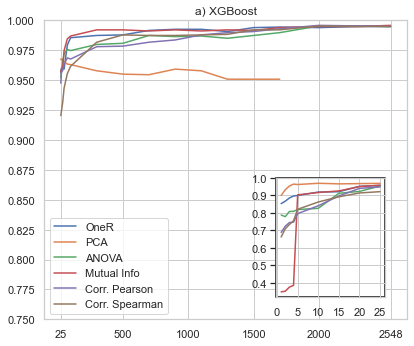

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5,5.5))
ax = plot_with_inset(df, ax, ['XGBoost'], 0)

In [ ]:
f.savefig(f"imgs/xgboost.png", dpi=80)

In [ ]:
df[df['feature selector']=='PCA'].sort_values(by=['accuracy', 'k'], ascending=[False, True])

,accuracy,params,duration,modelo,feature selector,k
430,0.972797,"0.8674648864682775,ovr,rbf,False",0 days 00:00:02.159449,SVM,PCA,75
405,0.972332,"0.984133308982271,ovo,poly,False",0 days 00:00:01.556918,SVM,PCA,40
406,0.972332,"0.991050859540898,ovo,poly,False",0 days 00:00:01.544905,SVM,PCA,40
415,0.972329,"0.990684144399347,ovo,poly,True",0 days 00:00:01.767417,SVM,PCA,50
416,0.972329,"0.479765068265682,ovo,rbf,True",0 days 00:00:01.817658,SVM,PCA,50
...,...,...,...,...,...,...
255,0.859762,"entropy,sqrt,0.1613776216395449,10",0 days 00:00:48.322632,RandomForest,PCA,1700
256,0.859288,"entropy,sqrt,0.0634384885772476,2",0 days 00:00:51.536795,RandomForest,PCA,1700
257,0.855070,"entropy,sqrt,0.0640663415246183,3",0 days 00:00:54.832257,RandomForest,PCA,1700
258,0.854598,"entropy,sqrt,0.1261253133465978,3",0 days 00:00:38.698057,RandomForest,PCA,1700


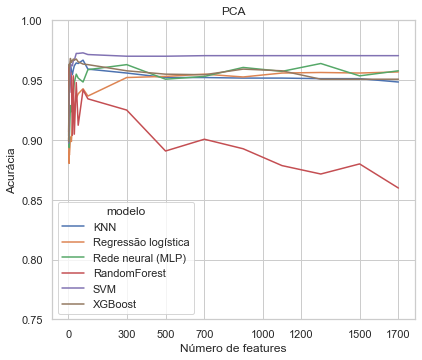

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5,5.5))

ax = sns.lineplot(
        data=df[df['feature selector']=='PCA'], 
        x='k', 
        y='accuracy', 
        hue='modelo',
    )
    
ax.set(
    title='PCA',
    ylim=(0.75, 1.0), 
    ylabel='Acurácia', 
    xlabel='Número de features')

ax.set_xticks([0, 300, 500, 700, 1000, 1200, 1500, 1700])
# ax.set_yticks([
#     .84, .86, .88, .90, .92, .94, .96, .98, 1
# ])

ax.figure.savefig(f"imgs/PCA.png", dpi=80)

In [ ]:
df[df.k<=50].sort_values(by=['k', 'accuracy'], ascending = [True, False]).groupby('k').first()

,accuracy,params,duration,modelo,feature selector
k,,,,,
1,0.906667,"gini,log2,0.0017391105164072,5",0 days 00:00:02.678392,RandomForest,PCA
2,0.932459,"37,3,2",0 days 00:00:00.062056,KNN,PCA
3,0.952639,"0.0027704881436301,dart,9.227096507378815e-08,5",0 days 00:00:01.461224,XGBoost,PCA
4,0.963418,"2.8540231947685873e-08,gbtree,1.11825313806623...",0 days 00:00:01.067475,XGBoost,PCA
5,0.961070,"2.2074325497668685e-06,gbtree,0.00249993127768...",0 days 00:00:02.287082,XGBoost,PCA
10,0.968102,"9.89600965525838e-06,gbtree,0.0104022365864718,4",0 days 00:00:02.297599,XGBoost,PCA
15,0.964823,"0.0260118412045198,dart,6.001180072286272e-07,3",0 days 00:00:02.810565,XGBoost,PCA
20,0.966226,"0.0007224175646619,gbtree,2.6222843779990245e-...",0 days 00:00:02.500772,XGBoost,PCA
25,0.967641,"0.0001560079825673,dart,0.0141187136540977,3",0 days 00:00:03.442778,XGBoost,PCA


In [ ]:
pca_plot_df = df[df['feature selector']=="PCA"]
pca_plot_df = pca_plot_df[pca_plot_df.modelo.isin(["XGBoost", "SVM", "KNN", "RandomForest"])]

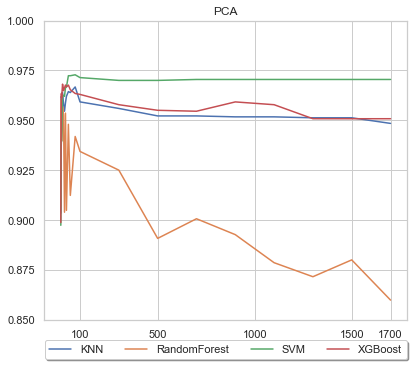

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5,5.5))

sns.lineplot(
    data = pca_plot_df, 
    x = 'k', 
    y = 'accuracy', 
    hue = 'modelo',
    ax = ax,
    markers = True,
)

ax.set(
    title="PCA",
#         ylim=(0.75, 1.0),
    xlabel = None,
    ylabel = None,
)

ax.set_xticks([100, 500, 1000, 1500, 1700])


ax.set_yticks([
    .85, .875, 
    .9, .925, .95, .975, 1
])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

#bbox_to_anchor=(1.05, 1)

# loc, borderpad = ("lower right", 2) 
# axins = inset_axes(ax, "30%", "40%", loc=loc, borderpad=borderpad)

# sns.set_theme(style="darkgrid")  

# sns.lineplot(
#     data = pca_plot_df[pca_plot_df.k<=25], 
#     x = 'k', 
#     y = 'accuracy', 
#     hue = 'modelo',
#     ax = axins,
#     markers = True,
# )

# sns.set_theme(style="darkgrid")
# axins.set(ylabel=None, xlabel=None)
# axins.set_xticks([0, 5, 10, 15, 20, 25])
# axins.set_yticks([.8, .85, .9, .95, 1])
# axins.yaxis.tick_left()
# axins.patch.set_edgecolor('black')  
# axins.patch.set_linewidth('1.5')
# axins.yaxis.set_label_position("left")
# axins.get_legend().remove()
    

In [ ]:
ax.figure.savefig(f"imgs/PCA.png", dpi=80)